In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.8.0
2.8.0


In [4]:
shuffle = False
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/content/drive/MyDrive/datasets/movie.csv', sep=",")
X = dataset["text"]
y = dataset["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=shuffle)

X_train, y_train
print(X_train[0])

I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.


# CNN
https://nlp.stanford.edu/projects/glove/

In [5]:
from keras.models import Sequential
from keras.callbacks import History, EarlyStopping
from keras.layers import Embedding, TextVectorization, Dense, LSTM, Input, Reshape, Flatten, Conv2D, MaxPooling2D

vectorize_layer = TextVectorization(
  max_tokens=50000,
  standardize="lower_and_strip_punctuation",
  ngrams = 2,
  output_sequence_length=100
)
vectorize_layer.adapt(X_train)

history_Adam = History()

model = Sequential()

# Vectorization
model.add(Input(shape=(1,), dtype=tf.string))
model.add(vectorize_layer)
# Embedding
model.add(Embedding(input_dim=len(vectorize_layer.get_vocabulary()), output_dim=16, input_length=100))

#Embedding returns a tensor so we nee
model.add(Reshape((40, 40, 1), input_shape=(16,100)))

model.add(Conv2D(1,(3,3), input_shape=(16,16), padding="same"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(6,(2,2),padding="same"))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 100)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 100, 16)           800000    
                                                                 
 reshape (Reshape)           (None, 40, 40, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 40, 40, 1)         10        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 1)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 6)         3

In [6]:
model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=50, callbacks=[history_Adam, early_stopping])

Epoch 1/20
400/400 [==============================] - 18s 16ms/step - loss: 0.5550 - accuracy: 0.6784 - val_loss: 0.4102 - val_accuracy: 0.8112
Epoch 2/20
400/400 [==============================] - 6s 15ms/step - loss: 0.2673 - accuracy: 0.8924 - val_loss: 0.4037 - val_accuracy: 0.8191
Epoch 3/20
400/400 [==============================] - 6s 15ms/step - loss: 0.0895 - accuracy: 0.9729 - val_loss: 0.5402 - val_accuracy: 0.8084
Epoch 4/20
400/400 [==============================] - 8s 19ms/step - loss: 0.0187 - accuracy: 0.9966 - val_loss: 0.7050 - val_accuracy: 0.8088
Epoch 5/20
400/400 [==============================] - 6s 16ms/step - loss: 0.0028 - accuracy: 0.9997 - val_loss: 0.8008 - val_accuracy: 0.8081
Epoch 5: early stopping


In [7]:
model.evaluate(X_test,y_test)

625/625 [==============================] - 4s 6ms/step - loss: 0.8008 - accuracy: 0.8081


[0.800812840461731, 0.8080999851226807]

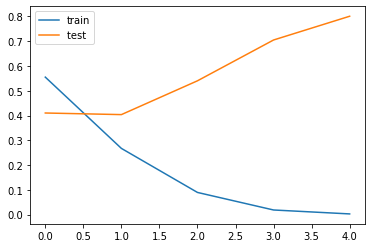

In [8]:
import matplotlib.pyplot as plt

plt.plot(history_Adam.history['loss'], label = "train")
plt.plot(history_Adam.history['val_loss'], label = "test ")



plt.legend()
plt.show()

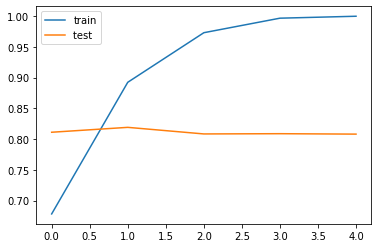

In [9]:
plt.plot(history_Adam.history['accuracy'], label = "train")
plt.plot(history_Adam.history['val_accuracy'], label = "test ")

plt.legend()
plt.show()


# CNN with GloVe

In [10]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2022-05-29 16:18:44--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-05-29 16:18:44--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-05-29 16:18:44--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [11]:
vectorize_layer = TextVectorization(
  max_tokens=50000,
  standardize="lower_and_strip_punctuation",
  output_sequence_length=100
)

vocab = vectorize_layer.get_vocabulary()
word_index = dict(zip(vocab, range(len(vocab))))

In [13]:
import os
import numpy as np

embeddings_index = {}
with open("/content/glove.6B.100d.txt") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

num_tokens = len(vocab) + 2
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Found 400000 word vectors.
Converted 0 words (2 misses)


In [ ]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

## CNN LNST Ensamble
https://arxiv.org/pdf/1904.04206.pdf